# Ensemble para identificação de doença cardíaca

**Nesse projeto iremos usar o método de ensemble para indentificar em um Dataset os pacientes com problemas cardíacos.**

<img src="https://i.imgur.com/i6kiFIx.jpg" />

## Heart Disease Data Set

### Conjunto de dados

Existem 13 colunas no conjunto de dados, que são descritas abaixo:

- slope: slope_of_peak_exercise_st_segment (type: int): a inclinação do segmento ST do pico do exercício, uma eletrocardiografia lida indicando a qualidade do fluxo sanguíneo no coração

- thal (tipo: categórico): resultados do teste de estresse com tálio que mede o fluxo sanguíneo para o coração, com possíveis valores normal, defeito fixo, defeito reversível

- resting_blood_pressure (type: int): pressão arterial em repouso

- chest: chest_pain_type (type: int): tipo de dor no peito (4 valores)

- num_major_vessels (type: int): número de vasos principais (0-3) coloridos por flourosopy

- fasting_blood_sugar_gt_120_mg_per_dl (tipo: binário): açúcar no sangue em jejum> 120 mg / dl

- resting_electrocardiographic_results: resting_ekg_results (type: int): resultados eletrocardiográficos de repouso (valores 0,1,2)

- serum_cholestoral: soro_colesterol_mg_por_dl (tipo: int): colesterol sérico em mg / dl

- oldpeak: oldpeak_eq_st_depression (tipo: float): oldpeak = depressão do ST induzida pelo exercício em relação ao repouso, uma medida de anormalidade nos eletrocardiogramas

- sex: sexo (tipo: binário): 0: feminino, 1: masculino

- age: idade (tipo: int): idade em anos

- maximum_heart_rate_achieved (type: int): frequência cardíaca máxima atingida (batimentos por minuto)

- exercise_induced_angina (tipo: binário): dor no peito induzida por exercício (0: Falso, 1: Verdadeiro)

Nosso objetivo é prever a classe binária **class**, que representa se um paciente tem ou não uma doença cardíaca:

- 0 representa nenhuma doença cardíaca presente
- 1 representa doença cardíaca presente

In [1]:
from pandas import set_option
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
%time df = pd.read_csv('C:/Users/skite/OneDrive/Documentos/GitHub/Ensemble2/dataset_53_heart-statlog_csv.csv', sep = ',', encoding  = 'ISO-8859-1')

Wall time: 28 ms


In [3]:
df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest                                 270 non-null    int64  
 3   resting_blood_pressure                270 non-null    int64  
 4   serum_cholestoral                     270 non-null    int64  
 5   fasting_blood_sugar                   270 non-null    int64  
 6   resting_electrocardiographic_results  270 non-null    int64  
 7   maximum_heart_rate_achieved           270 non-null    int64  
 8   exercise_induced_angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  slope                                 270 non-null    int64  
 11  number_of_major_ves

*Não temos dados faltantes, esse Dataset é relativamente pequeno e já está praticamente pronto para a aplicação de ensemble*

In [5]:
df.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


*Temos valores muito alto para o desfio padrão de age, resting_blood_pressure, serum_cholestoral, maximum_heart_rate_achieved. vamos plotar um distribuição das variáveis para melhor visualização.*

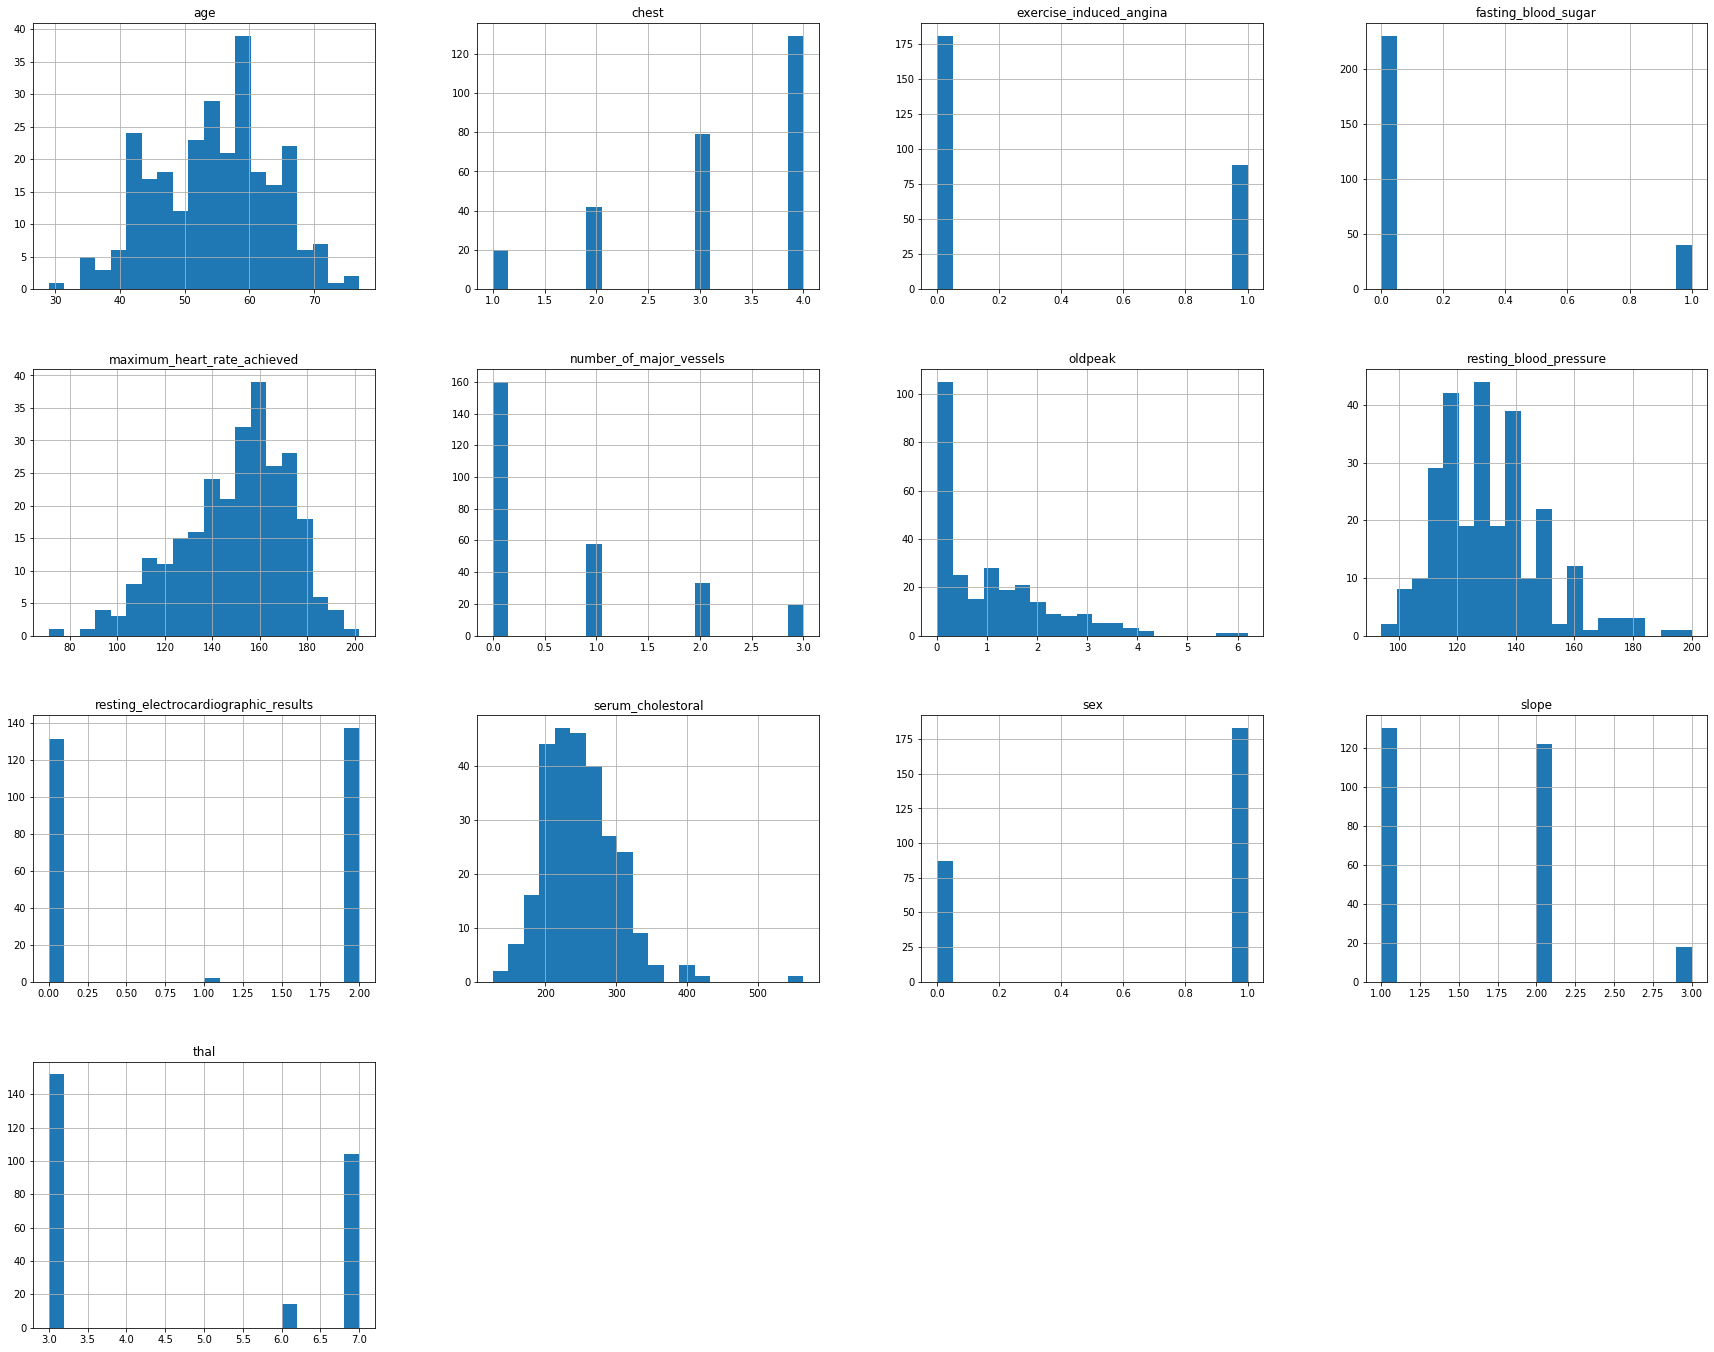

In [6]:
df.hist(figsize=(30,24),bins = 20)
plt.title("Distribuição das variáveis")
plt.show()

**Conforme identificamos na célula acima temos variáveis desbalanceadas que precisam de ajuste, mas não iremos fazer esses ajustes agora, pois quero ver como o método de ensemble se comporta com esses dados.**

*Agora vamos verificação do balanceamento da Target*

In [7]:
df['class'].value_counts()

absent     150
present    120
Name: class, dtype: int64

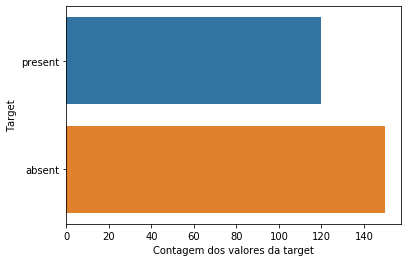

In [8]:
sns.countplot(y=df['class'] ,data=df)
plt.xlabel("Contagem dos valores da target")
plt.ylabel("Target")
plt.show()

**ok, agora vamos Substituindo os valores da variável target passando ela para binário**

In [9]:
df.replace({'absent': 0, 'present': 1},inplace=True)
df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## Separação dos dados em treino e teste

**separação em dados de treino - 189 primeiras linhas o que representa 70% dos dados para treino.**

In [10]:
train = df.iloc[:189,:] 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   189 non-null    int64  
 1   sex                                   189 non-null    int64  
 2   chest                                 189 non-null    int64  
 3   resting_blood_pressure                189 non-null    int64  
 4   serum_cholestoral                     189 non-null    int64  
 5   fasting_blood_sugar                   189 non-null    int64  
 6   resting_electrocardiographic_results  189 non-null    int64  
 7   maximum_heart_rate_achieved           189 non-null    int64  
 8   exercise_induced_angina               189 non-null    int64  
 9   oldpeak                               189 non-null    float64
 10  slope                                 189 non-null    int64  
 11  number_of_major_ves

In [11]:
df.tail()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


**Agora vamos separação em dados de teste - 81 ultimas linhas que representa 30% para os dados de teste**

In [12]:
test = df.iloc[189:270,:]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 189 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   81 non-null     int64  
 1   sex                                   81 non-null     int64  
 2   chest                                 81 non-null     int64  
 3   resting_blood_pressure                81 non-null     int64  
 4   serum_cholestoral                     81 non-null     int64  
 5   fasting_blood_sugar                   81 non-null     int64  
 6   resting_electrocardiographic_results  81 non-null     int64  
 7   maximum_heart_rate_achieved           81 non-null     int64  
 8   exercise_induced_angina               81 non-null     int64  
 9   oldpeak                               81 non-null     float64
 10  slope                                 81 non-null     int64  
 11  number_of_major_ve

In [13]:
test.tail()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


*Agora precisamos retirar dos dados de treino da vairável target*

In [14]:
train_labels = train['class']
train = train.drop(['class'],axis=1)
train.shape,train_labels.shape

((189, 13), (189,))

In [15]:
set_option('display.width', 100)
set_option('precision', 3)
train.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
count,189.000,189.000,189.000,189.000,189.000,189.000,189.000,189.000,189.000,189.000,189.000,189.000,189.000
mean,54.354,0.656,3.196,130.942,247.545,0.159,1.037,148.106,0.344,1.003,1.593,0.698,4.598
std,8.976,0.476,0.967,18.244,53.968,0.366,0.997,24.143,0.476,1.143,0.617,0.945,1.923
min,34.000,0.000,1.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,1.000,0.000,3.000
25%,47.000,0.000,3.000,120.000,211.000,0.000,0.000,130.000,0.000,0.000,1.000,0.000,3.000
50%,55.000,1.000,4.000,130.000,240.000,0.000,2.000,152.000,0.000,0.600,2.000,0.000,3.000
75%,61.000,1.000,4.000,140.000,274.000,0.000,2.000,165.000,1.000,1.600,2.000,1.000,7.000
max,76.000,1.000,4.000,200.000,564.000,1.000,2.000,195.000,1.000,5.600,3.000,3.000,7.000


*Agora vamos fazer o mesmo procedimento para os dados de teste ou seja dropar a target dos dados de teste.*

In [16]:
test_labels = test['class']
test = test.drop(['class'],axis=1)
test.shape,test_labels.shape

((81, 13), (81,))

In [17]:
test.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
189,70,1,3,160,269,0,0,112,1,2.9,2,1,7
190,54,1,4,140,239,0,0,160,0,1.2,1,0,3
191,70,1,4,145,174,0,0,125,1,2.6,3,0,7
192,54,1,2,108,309,0,0,156,0,0.0,1,0,7
193,35,1,4,126,282,0,2,156,1,0.0,1,0,7


In [18]:
train.shape,train_labels.shape,test.shape, test_labels.shape

((189, 13), (189,), (81, 13), (81,))

### Vamos fazer uma EDA para verificando a distribuição dos dados em relação à condição de doença cardíaca.

In [19]:
train_labels = pd.DataFrame(train_labels)
train_labels.groupby('class').size()

class
0    104
1     85
dtype: int64

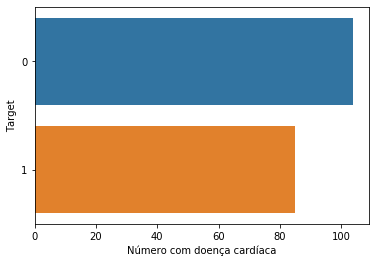

In [20]:
sns.countplot(y=train_labels['class'] ,data=train_labels)
plt.xlabel("Número com doença cardíaca")
plt.ylabel("Target")
plt.show()

In [21]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,189.0,54.354,8.976,34.0,47.0,55.0,61.0,76.0
sex,189.0,0.656,0.476,0.0,0.0,1.0,1.0,1.0
chest,189.0,3.196,0.967,1.0,3.0,4.0,4.0,4.0
resting_blood_pressure,189.0,130.942,18.244,94.0,120.0,130.0,140.0,200.0
serum_cholestoral,189.0,247.545,53.968,126.0,211.0,240.0,274.0,564.0
fasting_blood_sugar,189.0,0.159,0.366,0.0,0.0,0.0,0.0,1.0
resting_electrocardiographic_results,189.0,1.037,0.997,0.0,0.0,2.0,2.0,2.0
maximum_heart_rate_achieved,189.0,148.106,24.143,71.0,130.0,152.0,165.0,195.0
exercise_induced_angina,189.0,0.344,0.476,0.0,0.0,0.0,1.0,1.0
oldpeak,189.0,1.003,1.143,0.0,0.0,0.6,1.6,5.6


**plotando o heatmap de correlação**

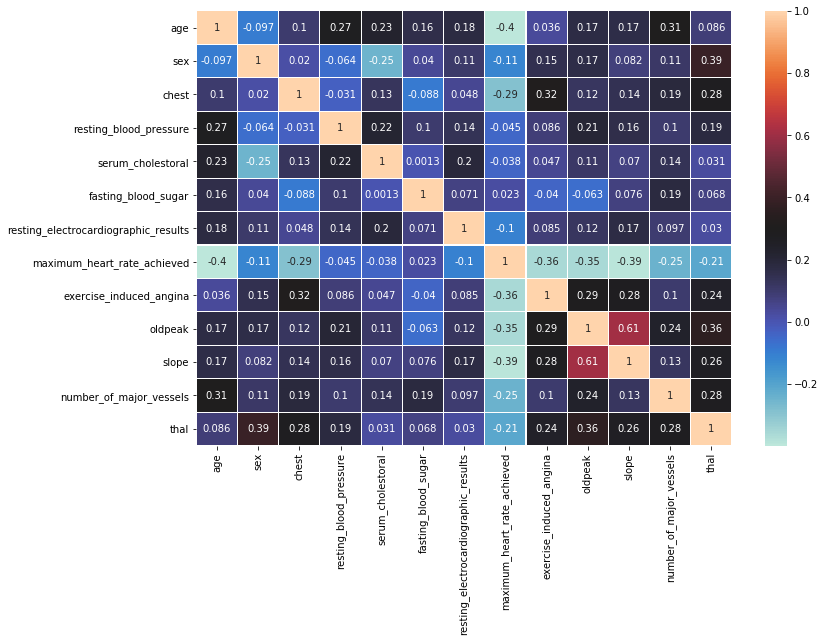

In [22]:
sns.heatmap(train.corr(method='pearson'),annot=True, cmap='icefire', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Note que em nosso dados de treino as variáveis tem baixa correlação entre si, tirando as variaveis slope x oldpear onde:
    
- slope: slope_of_peak_exercise_st_segment (type: int): a inclinação do segmento ST do pico do exercício, uma eletrocardiografia lida indicando a qualidade do fluxo sanguíneo no coração.
    
- oldpeak: oldpeak_eq_st_depression (tipo: float): oldpeak = depressão do ST induzida pelo exercício em relação ao repouso, uma medida de anormalidade nos eletrocardiogramas.   

## Vamos informa a importância das features

**O XGBoost possui a classe plot_importance que informa a importância das features**

*será necessário primeiro rodar o XGBoost para compreender a importância das colunas*

In [23]:
from xgboost import plot_importance
model = xgb.XGBClassifier()
model.fit(train, train_labels['class'].values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**plot feature importance**

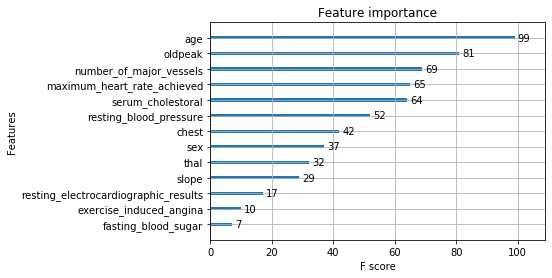

In [24]:
# plot feature importance
plot_importance(model)
plt.show()

*Essa feature é incrível e mostra as variáveis mais importantes do data set  ou seja as variáveis que mais implicam com a target.*

## Feature Engineering - variáveis categóricas

*Agora será necessário fazer o feature engineering das variáveis categóricas.*

*vamos "dummizando" os dados de treino e teste*

In [34]:
one_hot_encoded_training_predictors = pd.get_dummies(train)
one_hot_encoded_test_predictors = pd.get_dummies(test)
train,test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)  

## Rodando o modelo preditor com o XGBoost.

o que é o Ensemble XGBoost ?

*Antes de explicar o XGBoost primeiro preciso citar o Gradient boosting que usa a Modelagem Aditiva, na qual uma nova árvore de decisão é adicionada uma de cada vez a um modelo que minimiza a perda usando a descida de gradiente. As árvores existentes no modelo permanecem intocadas e, assim, diminuem a taxa de sobre ajuste. A saída da nova árvore é combinada com a saída das árvores existentes até que a perda seja minimizada abaixo de um limite ou seja atingido o limite especificado de árvores.
 A modelagem aditiva em matemática é uma divisão de uma função na adição de N sub funções. Em termos estatísticos, pode ser pensado como um modelo de regressão em que a resposta y é a soma aritmética dos efeitos individuais das variáveis preditoras x.*

**Xtreme Gradient Boosting:**

*O XGBoost é a Evolução do Gradient Boosting, concebido com requisitos extremos de performance e paralelismo. Conta também com otimizações que contemplam regularização e validação cruzada a cada etapa.*

<img src="https://i.imgur.com/1gZPE5o.png" />

# Vamos explorar todas as possibilidades do XGBoost

In [37]:
# dependências
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# spliting dos dados
X_train, X_test, y_train, y_test = train_test_split(train, train_labels['class'].values, test_size=0.10, random_state=7)

# ajuste do modelo de treino
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# fazendo previsões para dados de teste e avaliar
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.42%


*Ok, obtemos uma acurácia de 68.42% em nosso modelo*

## Validação de diferentes features selecionadas através do SelectFromModel

*Basicamente o SelectFromModel é Meta-transformador para selecionar recursos com base em pesos de importância.*

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [38]:
# Vamos fazer o fit do modelo usando diferentes features, iterativamente
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    
    # selecionando as features usando threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # treino do modelo
    selection_model = xgb.XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
    # avaliação do modelo
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=13, Accuracy: 68.42%
Thresh=0.027, n=12, Accuracy: 68.42%
Thresh=0.036, n=11, Accuracy: 68.42%
Thresh=0.040, n=10, Accuracy: 68.42%
Thresh=0.042, n=9, Accuracy: 68.42%
Thresh=0.043, n=8, Accuracy: 73.68%
Thresh=0.048, n=7, Accuracy: 68.42%
Thresh=0.058, n=6, Accuracy: 73.68%
Thresh=0.074, n=5, Accuracy: 68.42%
Thresh=0.104, n=4, Accuracy: 68.42%
Thresh=0.153, n=3, Accuracy: 78.95%
Thresh=0.171, n=2, Accuracy: 68.42%
Thresh=0.206, n=1, Accuracy: 63.16%


## Agora vamos verificando a performance do modelo para diferente número de estimadores

In [39]:
# spliting dos dados
train_X, test_X, train_Y, test_Y = train_test_split(train, 
                                                    train_labels, 
                                                    test_size=0.10, 
                                                    stratify=train_labels, 
                                                    random_state=42)
# resultados
print(train_X.shape, test_X.shape)
print()
print('Number of rows in Train dataset:',train_X.shape[0])
print()
print('Number of rows in Test dataset:',test_X.shape[0])

(170, 13) (19, 13)

Number of rows in Train dataset: 170

Number of rows in Test dataset: 19


*Normalização dos dados*

In [40]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

*O XGBoost usa uma métrica popular chamada logloss 'perda de log', assim como a maioria dos outros algoritmos de aumento de gradiente. Essa métrica baseada em probabilidade é usada para medir o desempenho de um modelo de classificação.*

*Nesse artigo Srishti Saha explica muito bem como funciona o logloss*

créditos: https://medium.com/datadriveninvestor/understanding-the-log-loss-function-of-xgboost-8842e99d975d

In [42]:
# running XGBoost model
model_base = xgb.XGBClassifier(max_depth=1,
                        subsample=0.33,
                        objective='binary:logistic',
                        n_estimators=50,
                        learning_rate = 0.12)
eval_set = [(train_X, train_Y.values.ravel()), (test_X, test_Y.values.ravel())]
model_base.fit(train_X, train_Y.values.ravel(), 
               early_stopping_rounds=15, 
               eval_metric=["error", "logloss"], 
               eval_set=eval_set)

[0]	validation_0-error:0.305882	validation_0-logloss:0.670562	validation_1-error:0.315789	validation_1-logloss:0.672204
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.235294	validation_0-logloss:0.643742	validation_1-error:0.105263	validation_1-logloss:0.640345
[2]	validation_0-error:0.270588	validation_0-logloss:0.625286	validation_1-error:0.105263	validation_1-logloss:0.604707
[3]	validation_0-error:0.252941	validation_0-logloss:0.603008	validation_1-error:0.105263	validation_1-logloss:0.575888
[4]	validation_0-error:0.217647	validation_0-logloss:0.581696	validation_1-error:0.157895	validation_1-logloss:0.561476
[5]	validation_0-error:0.2	validation_0-logloss:0.561776	validation_1-error:0.157895	validation_1-logloss:0.537821
[6]	validation_0-error:0.211765	validation_0-logloss:0.547827	validation_1-error:0.210526	validation_1-logloss:0.521017


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.12, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.33, verbosity=1)

## Predições nos dados de Teste

In [44]:
y_pred = model_base.predict(test_X)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(test_Y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.21%


**recuperando as métricas de desempenho**

In [45]:
results = model_base.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

## Plot do log loss e erro de classificação

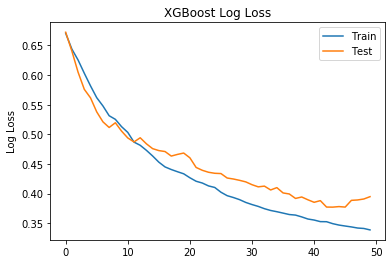

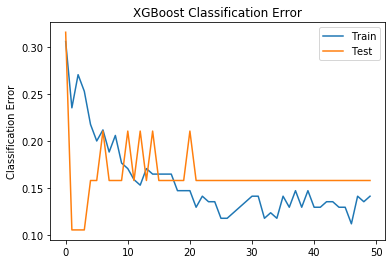

In [47]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()